In [79]:
# Importing necessary libraries for data manipulation (pandas, numpy) and visualization (matplotlib).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Mounting Google Drive to access and store files directly from the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Mounting Google Drive to access and store files directly from the Colab environment.
house_price_df=pd.read_csv('/content/drive/MyDrive/Part1_house_price.csv')

In [82]:
# Displaying the first 8 rows of the house price DataFrame to get an overview of the dataset's structure and contents.
house_price_df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [83]:
# Providing a summary of the DataFrame,
#number of entries, column names, data types, and non-null values to understand the dataset's structure and completeness.
house_price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   price          20000 non-null  float64
 3   bedrooms       20000 non-null  int64  
 4   bathrooms      20000 non-null  float64
 5   sqft_living    20000 non-null  int64  
 6   sqft_lot       20000 non-null  int64  
 7   floors         20000 non-null  float64
 8   waterfront     20000 non-null  int64  
 9   view           20000 non-null  int64  
 10  condition      20000 non-null  int64  
 11  grade          20000 non-null  int64  
 12  sqft_above     20000 non-null  int64  
 13  sqft_basement  20000 non-null  int64  
 14  yr_built       20000 non-null  int64  
 15  yr_renovated   20000 non-null  int64  
 16  zipcode        20000 non-null  int64  
 17  lat            20000 non-null  float64
 18  long  

In [84]:
house_price_df['date'] = house_price_df['date'].str.replace('T000000', '')


In [85]:
# Checking for missing values in each column of the house price DataFrame by summing the null entries to identify any data quality issues.
house_price_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [86]:
# Counting the number of missing values in each column of the house price DataFrame to assess data completeness and identify potential issues.
house_price_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [87]:
house_price_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
house_price_df.to_csv('/content/dataset.csv', index=False)

In [89]:
from google.colab import files

# Download the file
files.download('/content/dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
house_price_df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
house_price_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [92]:
# Calculating the correlation matrix of the house price DataFrame to find the relationships between different features.
house_price_df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009114,-0.015001,0.001319,0.002896,-0.013115,-0.136244,0.016064,-0.002530,0.013126,...,0.007036,-0.013140,-0.002709,0.018656,-0.016077,-0.007161,-0.001542,0.011681,-0.009457,-0.144805
date,0.009114,1.000000,0.000513,-0.010667,-0.030897,-0.030881,0.005161,-0.027766,-0.004696,0.000474,...,-0.033717,-0.025121,-0.016930,0.002031,-0.025623,0.000120,-0.029644,0.002537,-0.019568,0.000197
price,-0.015001,0.000513,1.000000,0.302251,0.523941,0.701250,0.085823,0.278866,0.268666,0.400225,...,0.665437,0.604985,0.321837,0.040316,0.135632,-0.044521,0.309454,0.011707,0.595727,0.077647
bedrooms,0.001319,-0.010667,0.302251,1.000000,0.517139,0.566322,0.029946,0.201525,-0.007204,0.077548,...,0.354602,0.460107,0.311535,0.157858,0.021463,-0.140396,0.001642,0.113977,0.374479,0.026115
bathrooms,0.002896,-0.030897,0.523941,0.517139,1.000000,0.760377,0.092251,0.503112,0.067608,0.195108,...,0.660382,0.684341,0.297576,0.487050,0.066193,-0.203861,0.027264,0.221651,0.575333,0.090736
sqft_living,-0.013115,-0.030881,0.701250,0.566322,0.760377,1.000000,0.171386,0.391932,0.107383,0.285543,...,0.766485,0.869714,0.446271,0.321798,0.064580,-0.184319,0.061972,0.221974,0.753095,0.181547
sqft_lot,-0.136244,0.005161,0.085823,0.029946,0.092251,0.171386,1.000000,0.015858,0.021823,0.069355,...,0.117625,0.186257,0.009035,0.076964,0.005529,-0.129324,-0.089458,0.231360,0.151502,0.707850
floors,0.016064,-0.027766,0.278866,0.201525,0.503112,0.391932,0.015858,1.000000,0.031871,0.047852,...,0.464396,0.567726,-0.236423,0.431846,0.027754,-0.077211,0.039919,0.155365,0.317891,0.011203
waterfront,-0.002530,-0.004696,0.268666,-0.007204,0.067608,0.107383,0.021823,0.031871,1.000000,0.404982,...,0.085797,0.076259,0.078987,-0.022071,0.093511,0.033106,-0.015095,-0.044640,0.089597,0.031871
view,0.013126,0.000474,0.400225,0.077548,0.195108,0.285543,0.069355,0.047852,0.404982,1.000000,...,0.257722,0.169527,0.270332,-0.045198,0.105018,0.091940,0.006394,-0.086152,0.287376,0.067255


the id,date and zipcode have a very low correlation

In [93]:
#dropping the column id,zipcode and date since they have a low correlation
house_price_df=house_price_df.drop(columns=["id","zipcode","date"])

In [94]:
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [95]:
house_price_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.000000e+04,20000.00000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,5.355679e+05,3.36445,2.072013,2057.90700,1.560637e+04,1.444950,0.00795,0.241800,3.441750,7.605750,1757.47270,300.43430,1967.956500,90.807500,47.56039,-122.215160,1974.286850,13115.936600
std,3.661845e+05,0.93374,0.762412,905.62543,4.177024e+04,0.516776,0.08881,0.777922,0.665454,1.172598,811.60698,447.61877,28.317996,415.937997,0.13932,0.139578,675.242028,26942.695517
min,7.500000e+04,0.00000,0.000000,290.00000,5.200000e+02,1.000000,0.00000,0.000000,1.000000,1.000000,290.00000,0.00000,1900.000000,0.000000,47.15590,-122.519000,399.000000,651.000000
25%,3.170000e+05,3.00000,1.500000,1420.00000,5.350000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1180.00000,0.00000,1950.000000,0.000000,47.46755,-122.327000,1490.000000,5347.750000
50%,4.499500e+05,3.00000,2.000000,1900.00000,7.819000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1540.00000,0.00000,1969.000000,0.000000,47.57295,-122.232000,1830.000000,7778.500000
75%,6.400000e+05,4.00000,2.500000,2510.00000,1.100000e+04,2.000000,0.00000,0.000000,4.000000,8.000000,2150.00000,590.00000,1991.000000,0.000000,47.67900,-122.127000,2337.000000,10240.000000
max,7.700000e+06,33.00000,8.000000,13540.00000,1.651359e+06,3.500000,1.00000,4.000000,5.000000,13.000000,9410.00000,4820.00000,2015.000000,2015.000000,47.77760,-121.315000,6210.000000,871200.000000


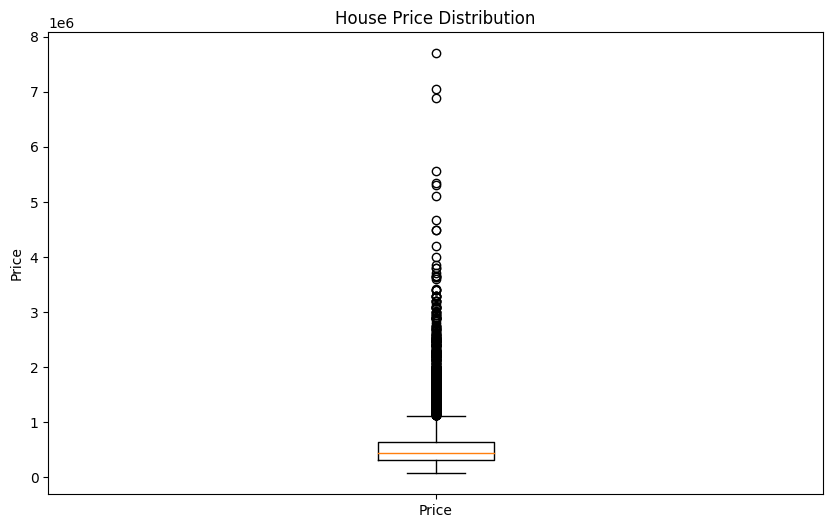

In [96]:
plt.figure(figsize=(10, 6))
plt.boxplot(house_price_df['price'])
plt.title("House Price Distribution")  # Title of the plot
plt.ylabel("Price")                    # Label for the y-axis
plt.xticks([1], ['Price'])             # Set x-ticks if needed

# Display the plot
plt.show()

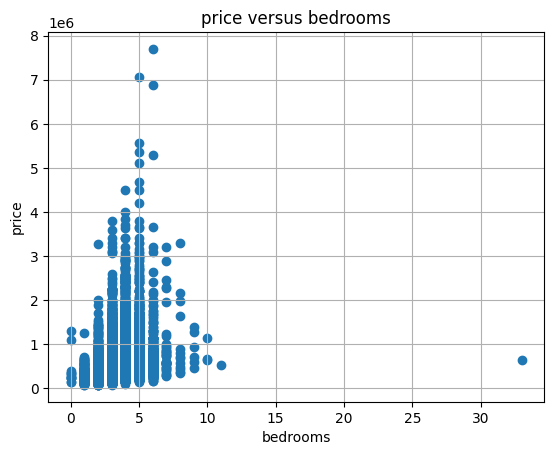

In [103]:
plt.scatter(house_price_df['bedrooms'],house_price_df['price'])
plt.title('price versus bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

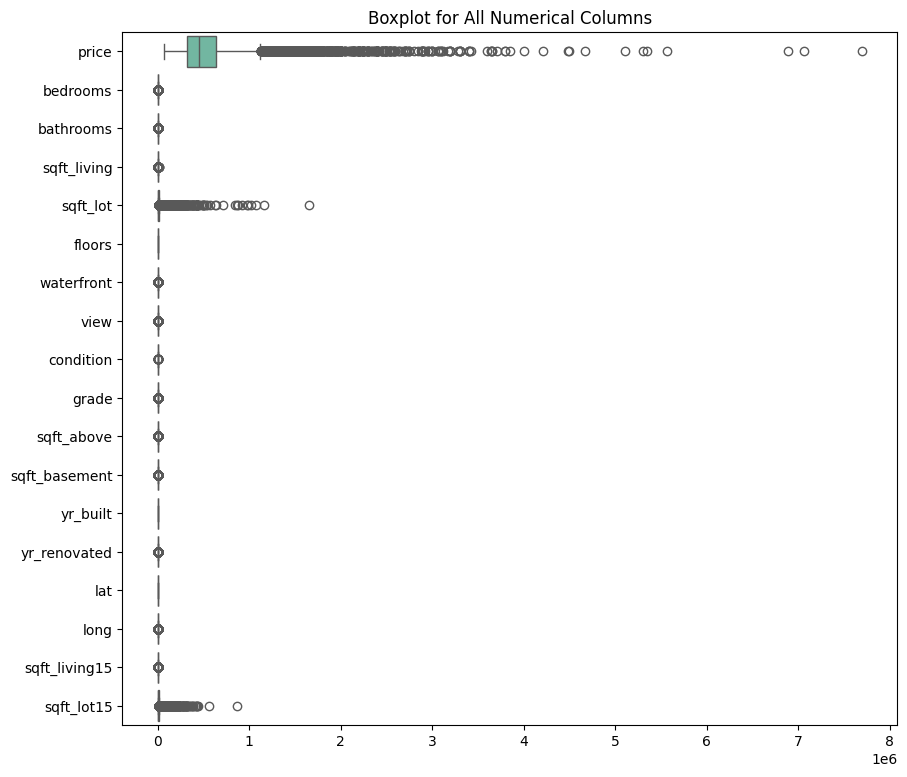

In [104]:
import seaborn as sns
# Creating a boxplot for all numerical columns in the DataFrame
plt.figure(figsize=(10, 9))
sns.boxplot(data=house_price_df, orient="h", palette="Set2")
plt.title("Boxplot for All Numerical Columns")
plt.show()

CREATION OF MODELS

In [ ]:
#importing essential libraries for splitting datase
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
#splitting dataset into features x and y by dropping price (x)and targeting variable (y) containig house price
x = house_price_df.drop(columns="price")
y = house_price_df["price"]

In [ ]:
# Defining features (X) by excluding the 'price' column and target variable (y) as the 'price' column from the house price DataFrame.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# creating of the model
model = LinearRegression()

In [ ]:
# setting the model
model.fit(X_train, y_train)

LinearRegression()

PREDICTION OF THE MODEL

In [ ]:
y_pred = model.predict(X_test)

EVALUATION METRICS


In [ ]:
## R2_Score and MSE
# Calculating and printing the Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE) to evaluate model performance on the test set.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  45990431828.04075
The R2 Score is:  0.7064191702264628
The MAE score is:  125328.42813266774


The high MSE score is caused by outliers in the dataset, since Mean Squared Error is affected a lot by these extreme values.

GRADIENT BOOSTING

In [105]:
# Initializing a Gradient Boosting Regressor model to be used for predicting house prices.
boost_model = GradientBoostingRegressor()

In [106]:
boost_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [107]:
# Perfomance metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  16578118449.591896
The R2 Score is:  0.8941732534994874
The MAE score is:  70510.17677625001


RANDOM FOREST MODEL


In [ ]:
# construction of the model
random_model = RandomForestRegressor()

In [ ]:
# establish the model
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# do the Predictions
y_test_pred = random_model.predict(X_test)

In [ ]:
# evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  16578118449.591896
The R2 Score is:  0.8941732534994874
The MAE score is:  70510.17677625001


FEATURE ENGINEERING
